## Q4

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

In [14]:
#A
def logsig(_x):
    return 1/(1+np.exp(-_x))

def train(train_inds): 
    """takes a list of indices and trains a 1-hidden layer netuork with a single output returns 
    weights of network in matrices W, V and a list with the error rate as functions of epoch"""
    Xb = X[train_inds]
    Y = y[train_inds]
    n, p = np.shape(Xb)
    #inital weights
    V = np.random.randn(M+1, 1);
    W = np.random.randn(p, M); #p is the number of inputs, bias included
    training_error = []
    for epoch in range(L):
        ind=np.random.permutation(n)
        for i in ind:
            #Forwardpropagate
            H=logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat=logsig(H@V)
            #Backpropagate
            delta=(Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew=V-alpha*H.T@delta
            gamma=delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew=W-alpha*Xb[[i],:].T@gamma
            V=Vnew
            W=Wnew
            #find training error
            H=logsig(np.hstack((np.ones((n,1)), Xb@W)))
            Yhat=logsig(H@V)
            training_error.append(np.mean(abs(np.round(Yhat[:,0])-Y[:0])) )
    return W,V,training_error
           
def test(test_inds, W, V):
    X_test=X[test_inds]
    y_test=y[test_inds]
    nt, _ = np.shape(X_test)
    H=logsig(np.hstack((np.ones((nt,1)), X_test@W)))
    Yhat=logsig(H@V)
    return np.mean(abs(np.round(Yhat[:,0])-y_test[:,0]))

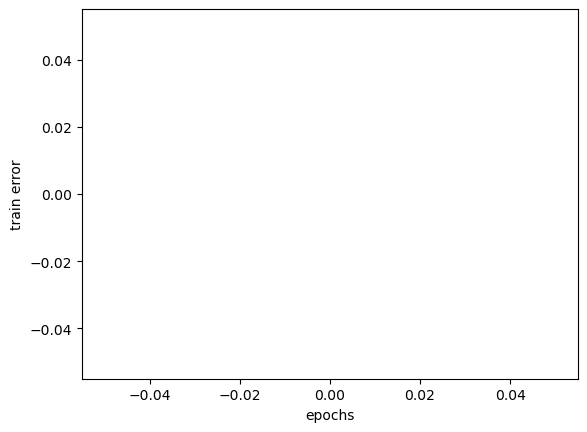

In [15]:
#B
alpha=.05 #step size
L=200 #epochs
M=32 #hidden nodes

for i in range(20):
    _,_,training_error=train(list(range(128)))
    plt.plot(training_error)
    
plt.ylabel("train error")
plt.xlabel("epochs")
plt.show()

In [ ]:
#C
alpha=.05
L=20
M=32

for ite in range(10):
    test_acc=[]
    for i in range(8):
        test_ind = np.arange(i*16, (i+1)*16)
        tain_ind=np.setdiff1d(np.arange(128), test_ind)
        W, V, training_error = train(train_id)
        error=test(test_ind, W, V)
        test_acc.append(error)
    print("Iter:", ite, "test_acc:", np.mean(test_acc))